IMPORTING DATASET

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
shap.initjs()
import fasttreeshap
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("creditriskdataset.csv")

DESCRIPTIVE ANALYSIS + CLEANING

In [3]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
data.shape

(32581, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [6]:
data.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [3]:
data.dropna(subset=['person_emp_length', 'loan_int_rate'], inplace=True)

In [6]:
data.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [4]:
data.drop(columns=['loan_amnt', 'loan_status', 'loan_percent_income', 'loan_int_rate'], inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28638 entries, 0 to 32580
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  28638 non-null  int64  
 1   person_income               28638 non-null  int64  
 2   person_home_ownership       28638 non-null  object 
 3   person_emp_length           28638 non-null  float64
 4   loan_intent                 28638 non-null  object 
 5   loan_grade                  28638 non-null  object 
 6   loan_int_rate               28638 non-null  float64
 7   cb_person_default_on_file   28638 non-null  object 
 8   cb_person_cred_hist_length  28638 non-null  int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 2.2+ MB


In [5]:
#average life expectancy in uk is 81 in the UK
data = data[data['person_age']<81]
#average retirement age is 66 currently, filtering employment length
emp_max = 66 - 18
data = data[data['person_emp_length'] <= emp_max]

data.shape

(28631, 8)

In [10]:
value_counts = data['loan_intent'].value_counts()
print(value_counts)

loan_intent
EDUCATION            5702
MEDICAL              5293
VENTURE              4999
PERSONAL             4874
DEBTCONSOLIDATION    4565
HOMEIMPROVEMENT      3198
Name: count, dtype: int64


In [6]:
data = data[~data['loan_intent'].isin(['EDUCATION', 'MEDICAL', 'VENTURE', 'DEBTCONSOLIDATION', 'HOMEIMPROVEMENT'])]
data.shape

(4874, 8)

In [7]:
data["cb_person_default_on_file"].value_counts()

cb_person_default_on_file
N    4018
Y     856
Name: count, dtype: int64

In [7]:
data.drop(columns=['loan_intent'], inplace=True)

In [22]:
data.shape

(4874, 8)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4874 entries, 8 to 32579
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  4874 non-null   int64  
 1   person_income               4874 non-null   int64  
 2   person_home_ownership       4874 non-null   object 
 3   person_emp_length           4874 non-null   float64
 4   loan_grade                  4874 non-null   object 
 5   loan_int_rate               4874 non-null   float64
 6   cb_person_default_on_file   4874 non-null   object 
 7   cb_person_cred_hist_length  4874 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 342.7+ KB


In [8]:
data.drop(columns=['loan_grade'], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4874 entries, 8 to 32579
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  4874 non-null   int64  
 1   person_income               4874 non-null   int64  
 2   person_home_ownership       4874 non-null   object 
 3   person_emp_length           4874 non-null   float64
 4   cb_person_default_on_file   4874 non-null   object 
 5   cb_person_cred_hist_length  4874 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 266.5+ KB


In [25]:
data.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_int_rate                 0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [9]:
data = data[data['person_home_ownership'] != 'OTHER' ]

In [27]:
unique_employment = data['person_emp_length'].unique() 
print(unique_employment)

[ 8.  9.  0.  3.  6.  4.  5.  1. 10.  2.  7. 11. 18. 12. 17. 15. 13. 16.
 14. 19. 20. 24. 22. 21. 25. 27. 38. 23. 30.]


ENCODING THE CATEGROICAL COLUMNS

In [10]:
data = data.rename(columns= {"person_age": "Age", "person_income": "Income", "person_emp_length": "Employment Years", "cb_person_cred_hist_length": "Credit History Years",
                              "person_home_ownership": "Home Ownership", "cb_person_default_on_file": "Defaulted on Loan"})

In [11]:
data.head(3)

,Age,Income,Home Ownership,Employment Years,Defaulted on Loan,Credit History Years
8,24,83000,RENT,8.0,N,2
21,25,137000,RENT,9.0,Y,2
23,24,10980,OWN,0.0,N,3


In [32]:
data.dtypes

Age                       int64
Income                    int64
Home Ownership           object
Employment Years        float64
Interest Rate           float64
Defaulted on Loan        object
Credit History Years      int64
dtype: object

EDA

Separating Numerical and Categorical Variables

In [12]:
categ_colums = data.select_dtypes(include=['object']).columns.tolist()
nume_colums = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(categ_colums)
print("Numerical Variables:")
print(nume_colums)

Categorical Variables:
['Home Ownership', 'Defaulted on Loan']
Numerical Variables:
['Age', 'Income', 'Employment Years', 'Credit History Years']


Statistics summary

In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4858.0,28.172705,7.052059,20.0,23.0,26.0,30.0,73.0
Income,4858.0,67378.241457,51730.183420,4200.0,39996.0,56208.0,80004.0,948000.0
Employment Years,4858.0,4.883285,4.085831,0.0,2.0,4.0,7.0,38.0
Credit History Years,4858.0,6.103746,4.581648,2.0,3.0,4.0,8.0,30.0


BOX PLOTS

<AxesSubplot:xlabel='Age'>

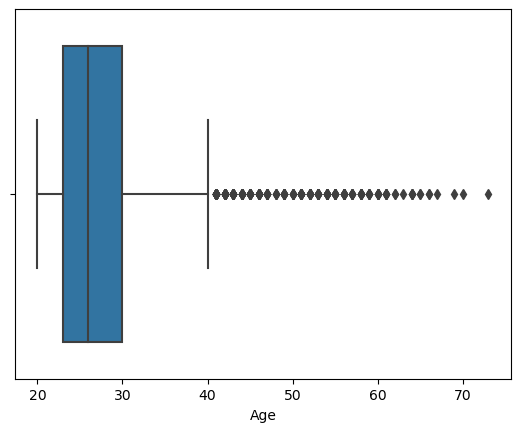

In [18]:
sns.boxplot(x=data['Age'])

<AxesSubplot:xlabel='Income'>

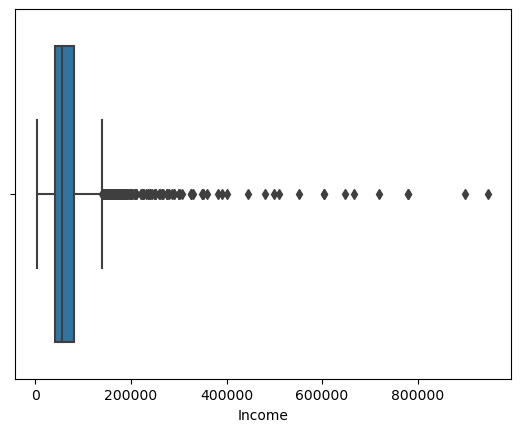

In [19]:
sns.boxplot(x=data['Income'])

<AxesSubplot:xlabel='Employment Years'>

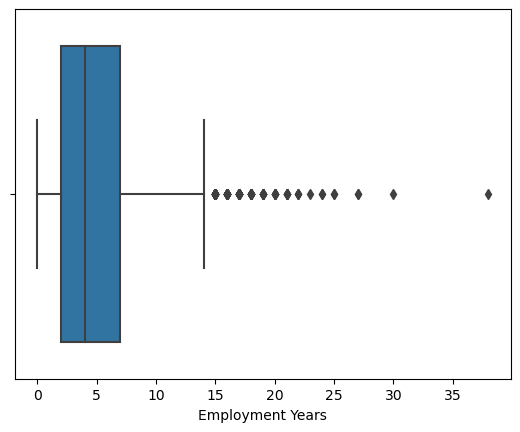

In [20]:
sns.boxplot(x=data['Employment Years'])

<AxesSubplot:xlabel='Credit History Years'>

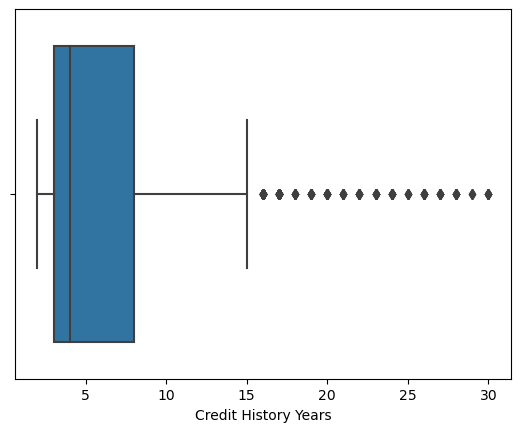

In [21]:
sns.boxplot(x=data['Credit History Years'])

HEAT MAP

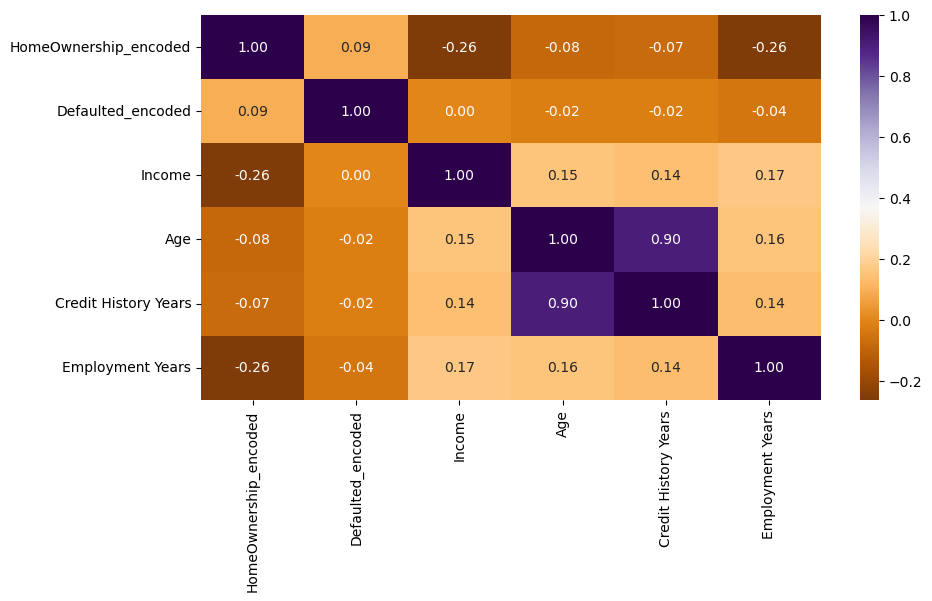

In [14]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['HomeOwnership_encoded'] = label_encoder.fit_transform(data['Home Ownership'])
data['Defaulted_encoded'] = label_encoder.fit_transform(data['Defaulted on Loan'])
plt.figure(figsize=(10,5))
columns_for_correlation = ['HomeOwnership_encoded','Defaulted_encoded', 'Income', 'Age', 'Credit History Years', 'Employment Years']
correlation_data = data[columns_for_correlation]
c = correlation_data.corr()
sns.heatmap(c, cmap="PuOr", annot=True, fmt=".2f")
plt.show()

QUESTION: HOW DOES AGE AFFECT THE TYPE OF HOME OWNERSHIP?

In [21]:
unique_age = data['Age'].unique() 
print(unique_age)

[24 25 22 23 26 21 20 34 29 35 33 27 30 28 31 32 42 36 41 45 38 50 39 44
 37 43 46 40 49 48 47 51 53 58 66 59 60 52 54 57 64 73 70 61 62 55 56 65
 63 69 67]


In [22]:
#defining bins
bins = [11, 31, 51, 71]
#relevant labels
labels = ['11-30', '31-50', '51-70']
#new column
data['Age Range'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

0 -  RENT, 1 - MORTGAGE, 2 - OWN

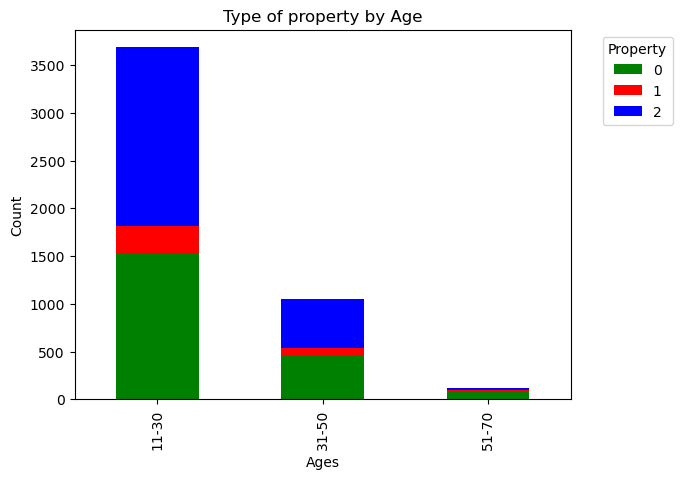

In [23]:
grouped = data.groupby(['Age Range', 'HomeOwnership_encoded']).size().unstack(fill_value=0)

# Plot the data
grouped.plot(kind='bar', stacked=True, color=['green', 'red', 'blue'])

#Plot label and title
plt.xlabel('Ages')
plt.ylabel('Count')
plt.title('Type of property by Age')

# Show the plot
plt.legend(title='Property', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

HOW DOES INCOME AFFECT TYPE OF HOME OWNERSHIP?

In [24]:
count_over_150k = len(data[data['Income'] > 150000])

print("Number of counts with values over 150,000:", count_over_150k)

Number of counts with values over 150,000: 184


In [25]:
index_of_max_income = data['Income'].idxmax()
row_highest_income = data.loc[index_of_max_income]
print("Row with the highest income:")
print(row_highest_income)

Row with the highest income:
Age                            34
Income                     948000
Home Ownership           MORTGAGE
Employment Years             18.0
Interest Rate                9.99
Defaulted on Loan               N
Credit History Years            7
HomeOwnership_encoded           0
Defaulted_encoded               0
Age Range                   31-50
Name: 17834, dtype: object


In [26]:
#defining bins
income_bins = [4200, 50000, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 950000]  
#relevant labels
income_labels = ['4.2k-50k', '50k-100k', '100k-200k', '200k-300k', '300k-400k', '400k-500k', '500k-600k', '600k-700k', '700k-800k', '800k-900k', '900k-950k']
#new column
data['Income Range'] = pd.cut(data['Income'], bins=income_bins, labels=income_labels, right=False)

0 -  RENT, 1 - MORTGAGE, 2 - OWN

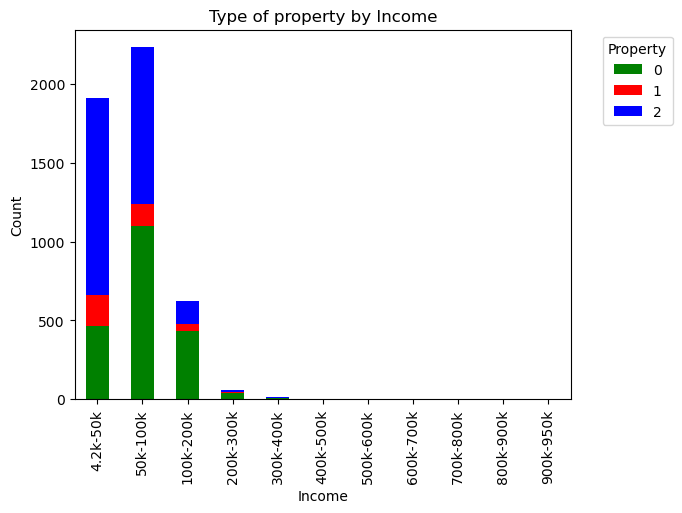

In [27]:
grouped = data.groupby(['Income Range', 'HomeOwnership_encoded']).size().unstack(fill_value=0)

# Plot the data
grouped.plot(kind='bar', stacked=True, color=['green', 'red', 'blue'])

#Plot label and title
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Type of property by Income')

# Show the plot
plt.legend(title='Property', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [28]:
yrs = data['Employment Years'].unique() 
print(yrs)

[ 8.  9.  0.  3.  6.  4.  5.  1. 10.  2.  7. 11. 18. 12. 17. 15. 13. 16.
 14. 19. 20. 24. 22. 21. 25. 27. 38. 23. 30.]


HOW DOES EMPLOYMENT YEARS AFFECT TYPE OF HOME OWNERSHIP?

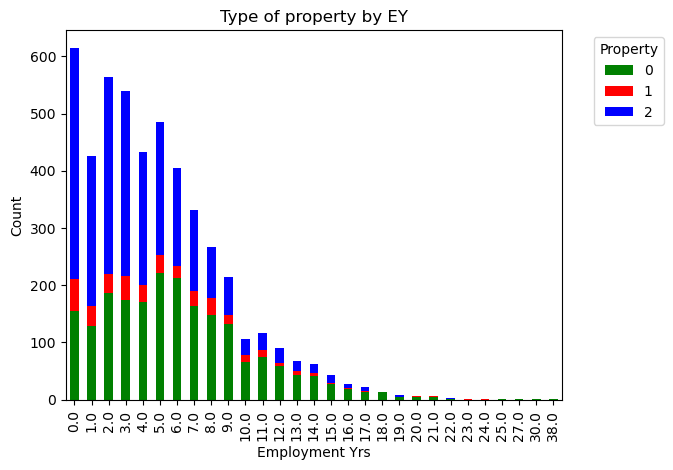

In [33]:
grouped = data.groupby(['Employment Years', 'HomeOwnership_encoded']).size().unstack(fill_value=0)

# Plot the data
grouped.plot(kind='bar', stacked=True, color=['green', 'red', 'blue'])

#Plot label and title
plt.xlabel('Employment Yrs')
plt.ylabel('Count')
plt.title('Type of property by EY')

# Show the plot
plt.legend(title='Property', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

HOW DOES EMPLOYMENT YEARS AFFECT DEFAULTING ON A LOAN?

In [29]:
#defining bins
emplo_bins = [0, 10, 20, 30, 40]  
#relevant labels
emplo_labels = ['0-10', '10-20', '20-30', '30-40']
#new column
data['Employment Range'] = pd.cut(data['Employment Years'], bins=emplo_bins, labels=emplo_labels, right=False)

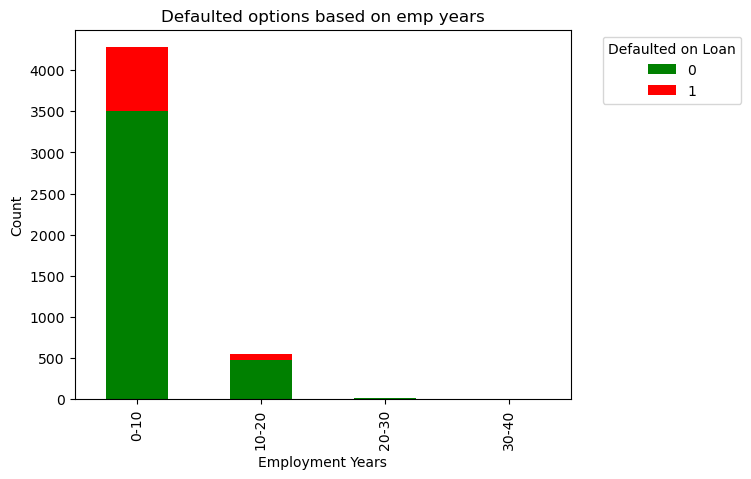

In [30]:
grouped = data.groupby(['Employment Range', 'Defaulted_encoded']).size().unstack(fill_value=0)

# Plot the data
grouped.plot(kind='bar', stacked=True, color=['green', 'red'])

#Plot label and title
plt.xlabel('Employment Years')
plt.ylabel('Count')
plt.title('Defaulted options based on emp years')

# Show the plot
plt.legend(title='Defaulted on Loan', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

HOW DOES INCOME DEFINE WHETHER ONE DEFAULTS ON A LOAN OR NOT

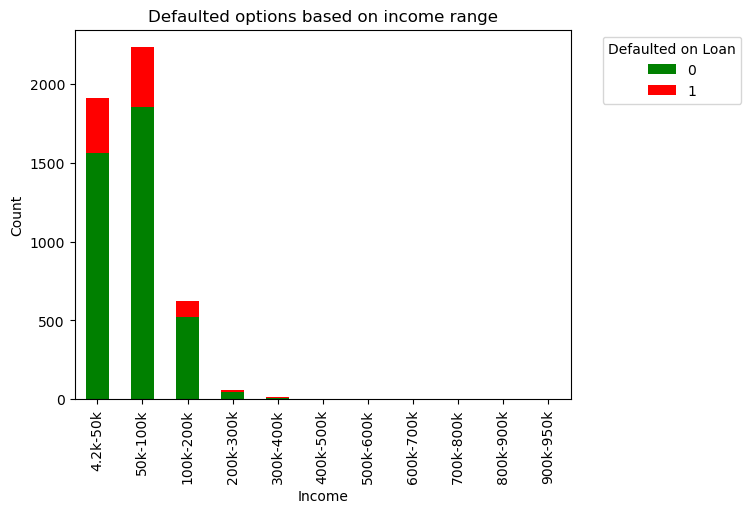

In [31]:
grouped = data.groupby(['Income Range', 'Defaulted_encoded']).size().unstack(fill_value=0)

# Plot the data
grouped.plot(kind='bar', stacked=True, color=['green', 'red'])

#Plot label and title
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Defaulted options based on income range')

# Show the plot
plt.legend(title='Defaulted on Loan', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

HOW DOES AGE DEFINE WHETHER ONE DEFAULTS ON A LOAN OR NOT

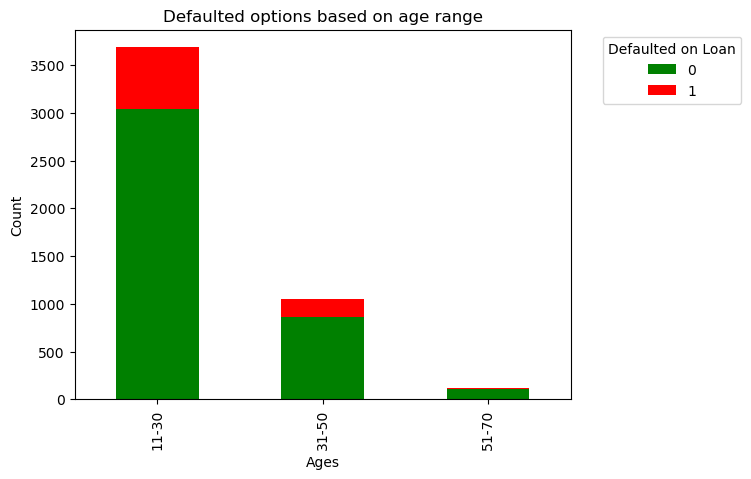

In [32]:
grouped = data.groupby(['Age Range', 'Defaulted_encoded']).size().unstack(fill_value=0)

# Plot the data
grouped.plot(kind='bar', stacked=True, color=['green', 'red'])

#Plot label and title
plt.xlabel('Ages')
plt.ylabel('Count')
plt.title('Defaulted options based on age range')

# Show the plot
plt.legend(title='Defaulted on Loan', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

MODEL FITTING

In [15]:
feature_columns = ['Age', 'Income', 'HomeOwnership_encoded', 'Employment Years', 'Credit History Years']
X = data[feature_columns]
y = data['Defaulted_encoded']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

LOGISTIC REGRESSION

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix


array([[793,   0],
       [179,   0]])

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred)

recall = recall_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred)

conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.8261316872427984
Precision: 0.0
Recall: 0.0
F1-score: 0.0
Confusion Matrix:
 [[803   0]
 [169   0]]


RANDOM FOREST

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


class_weights = {0: 1, 1: 5} 


rf = RandomForestClassifier(class_weight=class_weights)


rf.fit(X_train, y_train)


y_pred = rf.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)



Accuracy: 0.8024691358024691
Confusion Matrix:
[[770  31]
 [161  10]]


In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred)

recall = recall_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred)

conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.7993827160493827
Precision: 0.22916666666666666
Recall: 0.0650887573964497
F1-score: 0.10138248847926268
Confusion Matrix:
 [[766  37]
 [158  11]]


RANDOM OVERSAMPLING

In [17]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy=1)
X_res, y_res = ros.fit_resample(X, y)
y_res.value_counts()

Defaulted_encoded
0    4005
1    4005
Name: count, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)

y_pred_rf = rf_classifier.predict(X_test)

print(classification_report(y_test, y_pred_rf))

accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy:.2f}")

conf_matrix = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(conf_matrix)


              precision    recall  f1-score   support

           0       0.97      0.85      0.90       800
           1       0.86      0.97      0.92       802

    accuracy                           0.91      1602
   macro avg       0.92      0.91      0.91      1602
weighted avg       0.92      0.91      0.91      1602

Accuracy: 0.91
Confusion Matrix:
[[677 123]
 [ 21 781]]


CROSS VALIDATION

In [18]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

cv = StratifiedKFold(n_splits=5)
scores = cross_val_score(rf_classifier, X, y, cv=cv, scoring='accuracy')

print("Cross-Validation Scores:", scores)
print("Average score:", np.mean(scores))

Cross-Validation Scores: [0.77366255 0.7808642  0.80761317 0.80432544 0.78475798]
Average score: 0.7902446673701966


SAVE THE TRAINED MODEL

In [17]:
import pickle
model_loan_file = "defaulted_loan_model.pkl"
with open(model_loan_file, 'wb') as file:
    pickle.dump(rf_classifier, file)

VISUALISING CONFUSION MATRIX

<AxesSubplot:>

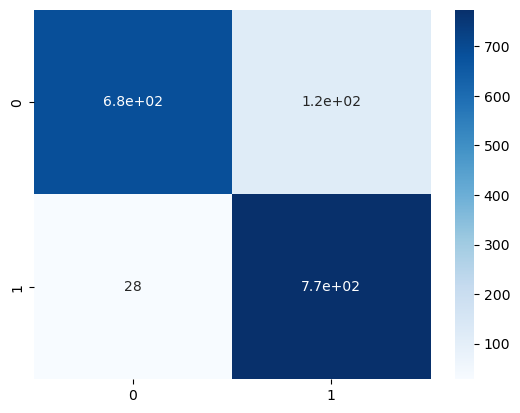

In [18]:
sns.heatmap(conf_matrix, annot=True, cmap='Blues')

Seeing the exact percentage

<AxesSubplot:>

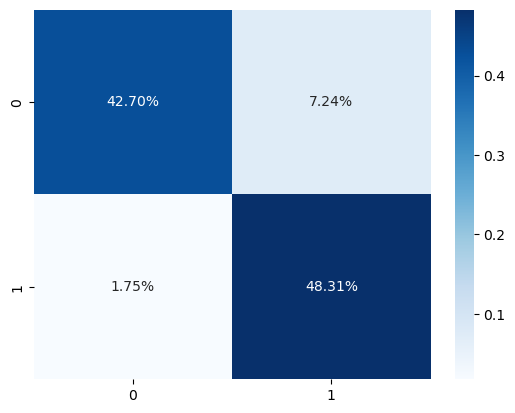

In [19]:
sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True, fmt='.2%', cmap='Blues')

Incorporating labels

<AxesSubplot:>

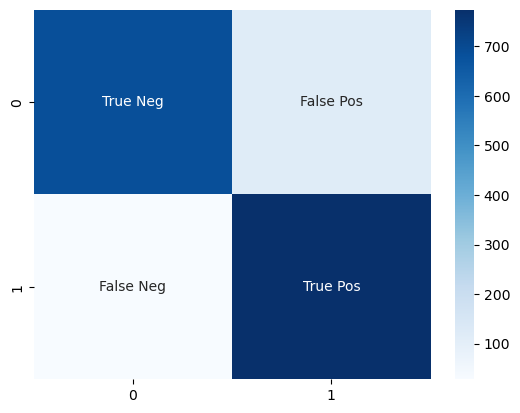

In [20]:
labels = ['True Neg','False Pos', 'False Neg', 'True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix, annot=labels, fmt = '', cmap='Blues')

RUNNING PYTHON SCRIPT TO TEST TO SEE OUTPUT 

In [22]:
import numpy as np

#Function to encode home ownership
def encode_home_ownership(home_ownership):
    home_ownership_lower = home_ownership.lower()  #so the input can be case insensitive
    
    if home_ownership_lower == 'own':
        return 0
    elif home_ownership_lower == 'rent':
        return 1
    elif home_ownership_lower == 'mortgage':
        return 2
    else:
        return 3 

#Collecting user input
age = int(input("Enter your age: "))
income = float(input("Enter your income: "))
home_ownership = input("Enter your home ownership (Own/Rent/Mortgage): ")
employment_years = int(input("Enter your employment years: "))
credit_history_years = int(input("Enter your credit history years: "))


#Encode home ownership
encoded_home_ownership = encode_home_ownership(home_ownership)

# Create feature vector
feature_vector = np.array([age, income, encoded_home_ownership, employment_years, credit_history_years]).reshape(1, -1)

# Make prediction
prediction = rf_classifier.predict(feature_vector)

# Interpret prediction
if prediction[0] == 1:
    print("Based on the provided information, you are likely to default on a loan.")
elif prediction[0] == 0:
    print("Based on the provided information, you are not likely to default on a loan.")
else:
    print("There is an error, review content.")


Based on the provided information, you are not likely to default on a loan.


Now adding the ability to ASSIGNING A SCORE BASED ON WHETHER THE USER DEFAULTS OR NOT

In [22]:
import numpy as np

# Function to encode home ownership
def encode_home_ownership(home_ownership):
    home_ownership_lower = home_ownership.lower()  # Convert input to lowercase
    
    if home_ownership_lower == 'rent':
        return 0
    elif home_ownership_lower == 'mortgage':
        return 1
    elif home_ownership_lower == 'own':
        return 2
    else:
        return 3 

# Collecting user input
age = int(input("Enter your age: "))
income = float(input("Enter your income: "))
home_ownership = input("Enter your home ownership (Own/Rent/Mortgage): ")
employment_years = int(input("Enter your employment years: "))
credit_history_years = int(input("Enter your credit history years: "))

# Encode home ownership
encoded_home_ownership = encode_home_ownership(home_ownership)

# Create feature vector
feature_vector = np.array([age, income, encoded_home_ownership, employment_years, credit_history_years]).reshape(1, -1)

# Make prediction
predicted = rf_classifier.predict(feature_vector)

if predicted[0] == 0:
    credit_score = np.random.randint(510, 711)  # Range for prediction 0
    likelihood = "not likely"
elif predicted[0] == 1:
    credit_score = np.random.randint(300, 510)  # Range for prediction 1
    likelihood = "likely"
else:
    print("There is an error in the prediction.")

# Print the result
print("Generated Credit Score:", credit_score)
print("Based on the provided information, you are", likelihood, "to default on a loan.")


Generated Credit Score: 665
Based on the provided information, you are not likely to default on a loan.


INTEPRETING THE SHAPLEY VALUES OF THE MODEL - ENHANCED MODEL UNDERSTANDING

NOT DEFAULTED ON A LOAN

Utilising the different versions of fasttree SHAP values to see which one has a faster output 
V1 = 12.5s
V2 = 12.4s
Auto = 11.7s

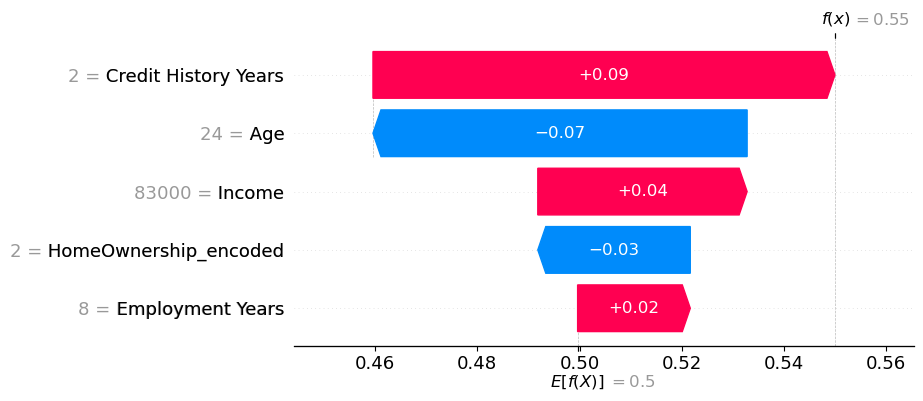

In [17]:
explainer = fasttreeshap.TreeExplainer(rf_classifier, algorithm = "v1")
shap_values = explainer.shap_values(X)

#shap values saved as a list automatically so need to convert it into an array before 
shap_values_array = np.array(shap_values)

#create an explanation obj - for the not defaulted loan
exp = shap.Explanation(values=shap_values_array[:, 0, :], base_values=explainer.expected_value[0], data=X)

#display the waterfall plot
shap.plots.waterfall(exp[0])

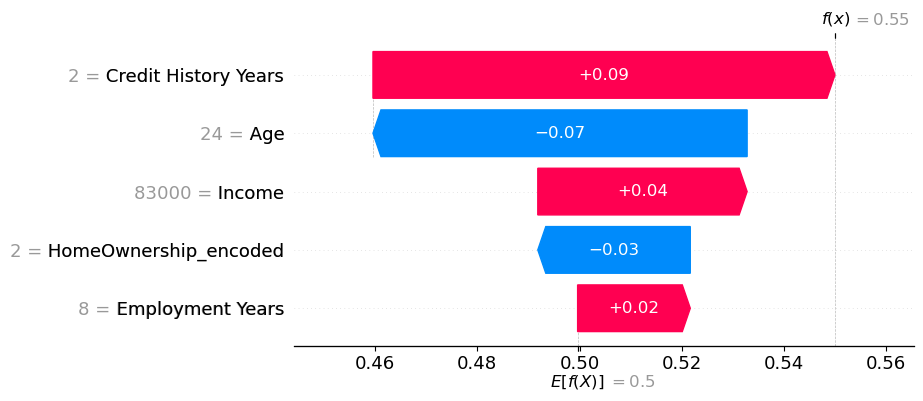

In [18]:
explainer = fasttreeshap.TreeExplainer(rf_classifier, algorithm = "v2")
shap_values = explainer.shap_values(X)

#shap values saved as a list automatically so need to convert it into an array before 
shap_values_array = np.array(shap_values)

#create an explanation obj - for the not defaulted loan
exp = shap.Explanation(values=shap_values_array[:, 0, :], base_values=explainer.expected_value[0], data=X)

#display the waterfall plot
shap.plots.waterfall(exp[0])

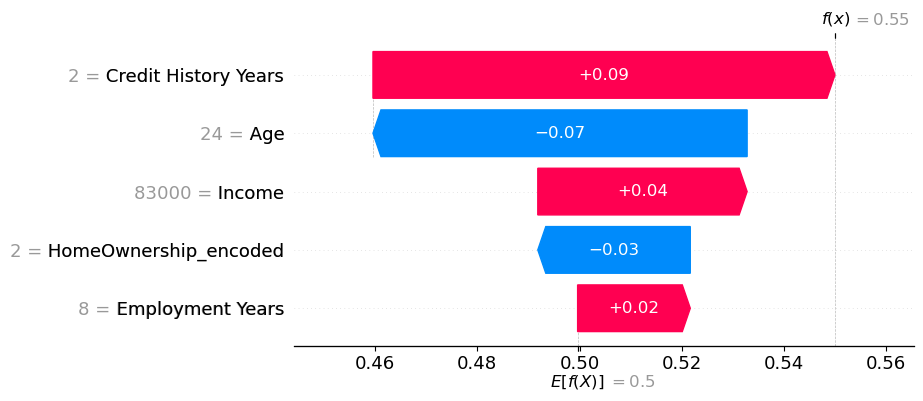

In [19]:
explainer = fasttreeshap.TreeExplainer(rf_classifier, algorithm = "auto")
shap_values = explainer.shap_values(X)

#shap values saved as a list automatically so need to convert it into an array before 
shap_values_array = np.array(shap_values)

#create an explanation obj - for the not defaulted loan
exp = shap.Explanation(values=shap_values_array[:, 0, :], base_values=explainer.expected_value[0], data=X)

#display the waterfall plot
shap.plots.waterfall(exp[0])

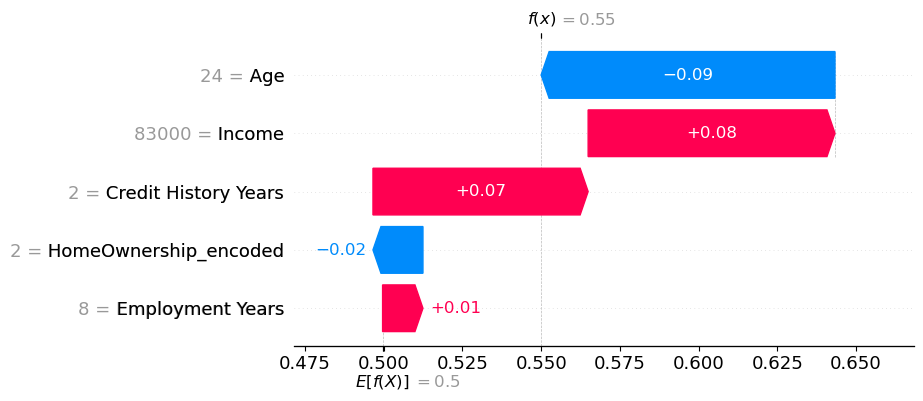

In [19]:
explainer = shap.TreeExplainer(rf_classifier)
shap_values = explainer.shap_values(X)

#shap values saved as a list automatically so need to convert it into an array before 
shap_values_array = np.array(shap_values)

#create an explanation obj - for the not defaulted loan
exp = shap.Explanation(values=shap_values_array[:, 0, :], base_values=explainer.expected_value[0], data=X)

#display the waterfall plot
shap.plots.waterfall(exp[0])


In [22]:
#show display for the force plot - not defaulted loan
shap.plots.force(exp[0])

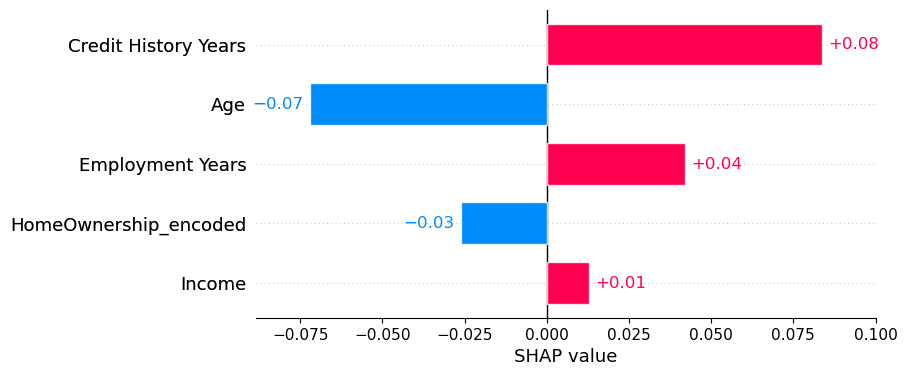

In [23]:
#show display for local bar plot - not defaulted on loan
shap.plots.bar(exp[0])

DEFAULTED 

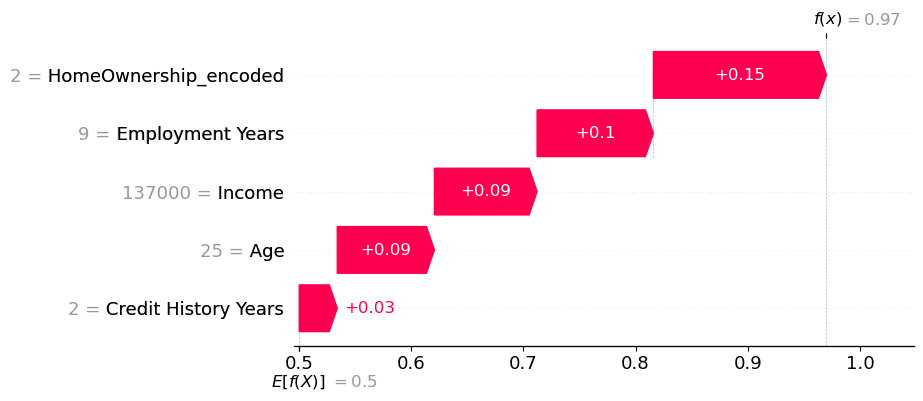

In [24]:
#create an explanation obj - for the  defaulted loan
exp = shap.Explanation(values=shap_values_array[:, 1, :], base_values=explainer.expected_value[1], data=X)

#display the waterfall plot
shap.plots.waterfall(exp[1])

In [25]:
#show display for the force plot - defaulted loan
shap.plots.force(exp[1])

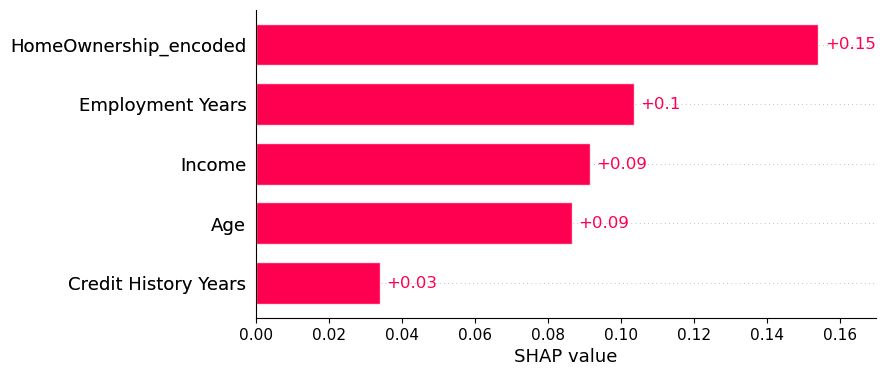

In [26]:
#show display for local bar plot - defaulted on loan
shap.plots.bar(exp[1])

In [20]:
#trying to get an output for shap values - not defaulted on a loan

feature_cols = ['Age', 'Income', 'HomeOwnership_encoded', 'Employment Years', 'Credit History Years']

def shap_percentages(shap_values_array):
    shap_default = shap_values_array[0, :, :]

    av_shapvalues = np.mean(np.abs(shap_default), axis=0)
    total_shapvalues = np.sum(av_shapvalues)

    print ("Feature contributions for not defaulting on a loan:")
    for i, feature in enumerate(feature_cols):
      contribution_percent = (av_shapvalues[i] / total_shapvalues) * 100
      print (f"{feature} contributed to {contribution_percent:.2f}% of the decision")

shap_values_array_example = np.random.rand(2, 1, len(feature_cols)) 
shap_percentages(shap_values_array_example)


Feature contributions for not defaulting on a loan:
Age contributed to 29.20% of the decision
Income contributed to 12.18% of the decision
HomeOwnership_encoded contributed to 25.58% of the decision
Employment Years contributed to 15.39% of the decision
Credit History Years contributed to 17.65% of the decision


In [31]:
#trying to get an output for shap values - defaulted on a loan

feature_cols = ['Age', 'Income', 'HomeOwnership_encoded', 'Employment Years', 'Credit History Years']

def shap_percentages(shap_values_array):
    shap_default = shap_values_array[1, :, :]

    av_shapvalues = np.mean(np.abs(shap_default), axis=0)
    total_shapvalues = np.sum(av_shapvalues)

    print ("Feature contributions for defaulting on a loan:")
    for i, feature in enumerate(feature_cols):
      contribution_percent = (av_shapvalues[i] / total_shapvalues) * 100
      print (f"{feature} contributed to {contribution_percent:.2f}% of the decision")

shap_values_array_example = np.random.rand(2, 1, len(feature_cols)) 
shap_percentages(shap_values_array_example)


Feature contributions for defaulting on a loan:
Age contributed to 21.46% of the decision
Income contributed to 43.88% of the decision
HomeOwnership_encoded contributed to 2.39% of the decision
Employment Years contributed to 23.19% of the decision
Credit History Years contributed to 9.08% of the decision
